In [1]:
import os
import scanpy as sc
from os.path import join

import sys
sys.path.insert(0, '../../..')

from spamosaic.framework import SpaMosaic

In [2]:
import os
print(os.environ.get('R_HOME'))  # 应输出 /deltadisk/miniconda3/envs/SpaMosaic/lib/R
print(os.environ.get('R_USER'))  # 应输出 /deltadisk/miniconda3/envs/SpaMosaic/lib/python3.8/site-packages/rpy2
os.environ['R_HOME'] = '/deltadisk/miniconda3/envs/SpaMosaic/lib/R'
os.environ['R_USER'] = '/deltadisk/miniconda3/envs/SpaMosaic/lib/python3.8/site-packages/rpy2'
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'  # for CuBLAS operation and you have CUDA >= 10.2
import spamosaic.utils as utls
from spamosaic.preprocessing import RNA_preprocess, ADT_preprocess, Epigenome_preprocess

None
None


In [3]:
data_dir = '/deltadisk/zhangrongyu/SpaMosaic/data/integration/Human_lymph_node'

ad1_rna = sc.read_h5ad(join(data_dir, 'slice1/s1_adata_rna.h5ad'))
ad2_rna = sc.read_h5ad(join(data_dir, 'slice2/s2_adata_rna.h5ad'))
ad3_rna = sc.read_h5ad(join(data_dir, 'slice3/s3_adata_rna.h5ad'))

### preprocessing

In [4]:
input_dict = {
    'rna': [ad1_rna, ad2_rna, ad3_rna],
    # 'adt': [ad1_adt, None,    ad3_adt]
}

input_key = 'dimred_bc'

In [5]:
RNA_preprocess(input_dict['rna'], batch_corr=True, favor='scanpy', n_hvg=5000, batch_key='src', key=input_key)
# ADT_preprocess(input_dict['adt'], batch_corr=True, batch_key='src', key=input_key)

Use GPU mode.
	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
Reach convergence after 4 iteration(s).


In [ ]:
ad_embs = sc.read_h5ad('/deltadisk/zhangrongyu/SpaMosaic/reproduce/integration_examples/horizontal/merged_embeddings_inr_False_dp_True.h5ad')
ad_mosaic = sc.concat(ad_embs)
ad_mosaic = utls.get_umap(ad_mosaic, use_reps=['merged_emb'])

/deltadisk/miniconda3/envs/SpaMosaic/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


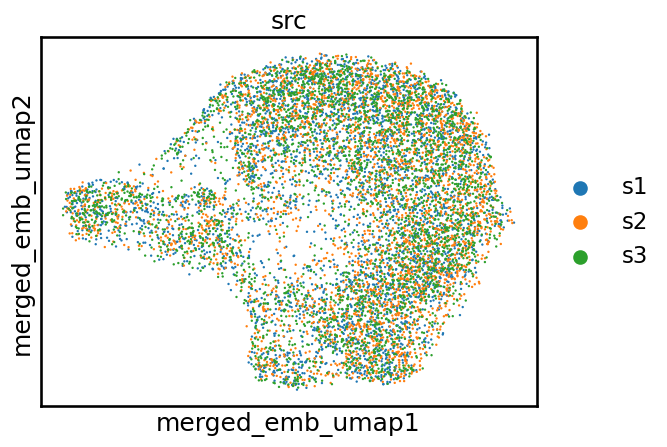

In [9]:
utls.plot_basis(ad_mosaic, basis='merged_emb_umap', color=['src'])

### clustering

In [10]:
utls.clustering(ad_mosaic, n_cluster=7, used_obsm='merged_emb', algo='mclust', key='mclust')
utls.split_adata_ob(ad_embs, ad_mosaic, 'obs', 'mclust')

R[write to console]: Error in (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  : 
  there is no package called ‘mclust’

/deltadisk/miniconda3/envs/SpaMosaic/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


mclust failed


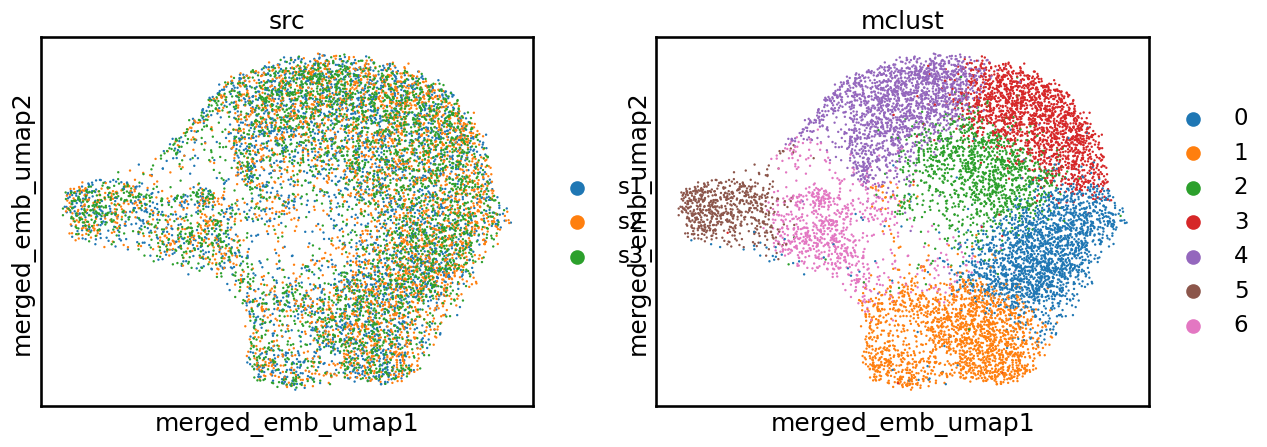

In [11]:
utls.plot_basis(ad_mosaic, basis='merged_emb_umap', color=['src', 'mclust'])

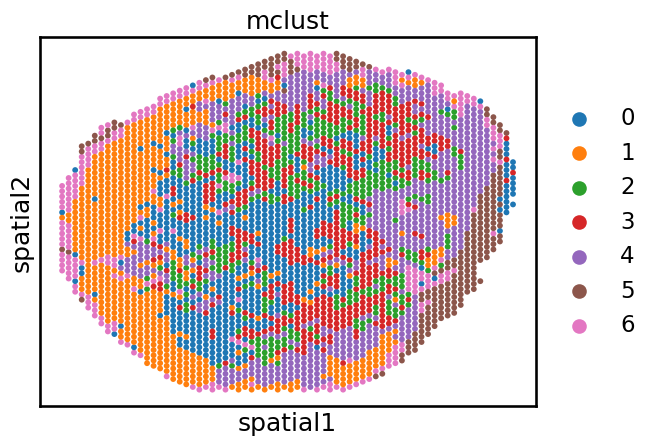

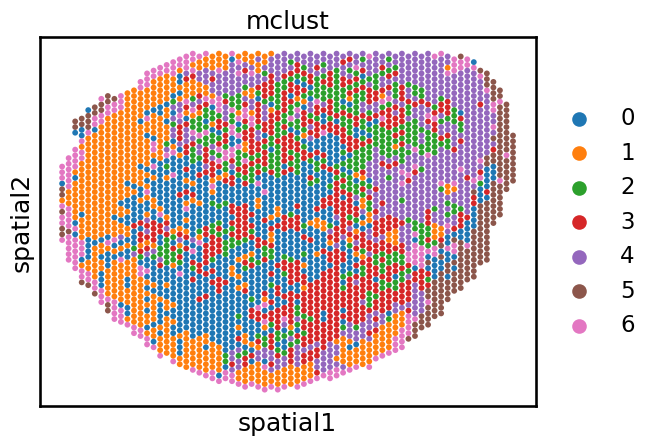

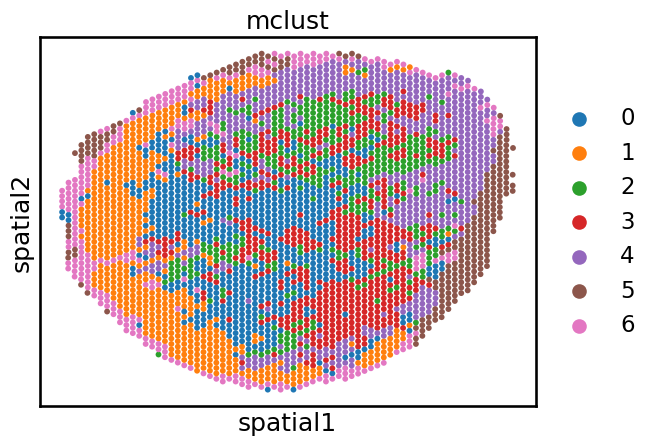

In [12]:
for ad in ad_embs:
    utls.plot_basis(ad, 'spatial', 'mclust', s=70)